# What to expect after graduation?
***

***Piotr Skalski - 02.11.2017***

## Table of Contents
***
* [1. Introduction](#introduction) <br>
* [2. Importing dataset and data preprocessing](#importing_dataset_and_data_preprocessing) <br>
   * [2.1. Importing essential libraries](#importing_essential_libraries) <br>
   * [2.2. Importing datasets](#importing_datasets) <br>
   * [2.3. Let's summarize the datasets](#lets_summarize_the_dataset) <br>
   * [2.4. Data preprocessing](#data_preprocessing) <br>
* [3. Data Visualization](#data_visualization) <br>
   * [3.1. Starting median salary distribution by major](#starting_median_salary_distribution) <br>
   * [3.2. Long term investment](#long_term_investment) <br>   
***

## 1. Introduction
<a id="introduction"></a>

The <a href="https://www.kaggle.com/wsj/college-salaries">Where it Pays to Attend College</a> dataset is not new - it was published more than half a year ago. Unfortunately I was not a member of Kaggle back then. As I am a student myself, this problem is quite interesting to me, so I decided to check which majors offer the greatest prospects.

## 2. Importing dataset and data preprocessing
<a id="importing_dataset_and_data_preprocessing"></a>

### 2.1. Importing essential libraries
<a id="importing_essential_libraries"></a>

In [127]:
import numpy as np
import pandas as pd
import geopandas as gpd
from scipy.optimize import curve_fit
import seaborn as sns

from math import radians, cos, sin, asin, sqrt

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

### 2.2. Importing datasets
<a id="importing_datasets"></a>

In [128]:
college = pd.read_csv('../00_Datasets/College/salaries-by-college-type.csv')
region = pd.read_csv('../00_Datasets/College/salaries-by-region.csv')
majors = pd.read_csv('../00_Datasets/College/degrees-that-pay-back.csv')
# List of all datasets
datasets_list = [college, region, majors]

### 2.3. Let's summarize the datasets
<a id="lets_summarize_the_dataset"></a>

In [129]:
college.head()

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Massachusetts Institute of Technology (MIT),Engineering,"$72,200.00","$126,000.00","$76,800.00","$99,200.00","$168,000.00","$220,000.00"
1,California Institute of Technology (CIT),Engineering,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,Engineering,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"Polytechnic University of New York, Brooklyn",Engineering,"$62,400.00","$114,000.00","$66,800.00","$94,300.00","$143,000.00","$190,000.00"
4,Cooper Union,Engineering,"$62,200.00","$114,000.00",NaN,"$80,200.00","$142,000.00",NaN


In [130]:
college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 8 columns):
School Name                          269 non-null object
School Type                          269 non-null object
Starting Median Salary               269 non-null object
Mid-Career Median Salary             269 non-null object
Mid-Career 10th Percentile Salary    231 non-null object
Mid-Career 25th Percentile Salary    269 non-null object
Mid-Career 75th Percentile Salary    269 non-null object
Mid-Career 90th Percentile Salary    231 non-null object
dtypes: object(8)
memory usage: 16.9+ KB


In [131]:
region.head()

,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Stanford University,California,"$70,400.00","$129,000.00","$68,400.00","$93,100.00","$184,000.00","$257,000.00"
1,California Institute of Technology (CIT),California,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,California,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"University of California, Berkeley",California,"$59,900.00","$112,000.00","$59,500.00","$81,000.00","$149,000.00","$201,000.00"
4,Occidental College,California,"$51,900.00","$105,000.00",NaN,"$54,800.00","$157,000.00",NaN


In [132]:
region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 8 columns):
School Name                          320 non-null object
Region                               320 non-null object
Starting Median Salary               320 non-null object
Mid-Career Median Salary             320 non-null object
Mid-Career 10th Percentile Salary    273 non-null object
Mid-Career 25th Percentile Salary    320 non-null object
Mid-Career 75th Percentile Salary    320 non-null object
Mid-Career 90th Percentile Salary    273 non-null object
dtypes: object(8)
memory usage: 20.1+ KB


In [133]:
majors.head()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,"$46,000.00","$77,100.00",67.6,"$42,200.00","$56,100.00","$108,000.00","$152,000.00"
1,Aerospace Engineering,"$57,700.00","$101,000.00",75.0,"$64,300.00","$82,100.00","$127,000.00","$161,000.00"
2,Agriculture,"$42,600.00","$71,900.00",68.8,"$36,300.00","$52,100.00","$96,300.00","$150,000.00"
3,Anthropology,"$36,800.00","$61,500.00",67.1,"$33,800.00","$45,500.00","$89,300.00","$138,000.00"
4,Architecture,"$41,600.00","$76,800.00",84.6,"$50,600.00","$62,200.00","$97,000.00","$136,000.00"


In [134]:
majors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
Undergraduate Major                                  50 non-null object
Starting Median Salary                               50 non-null object
Mid-Career Median Salary                             50 non-null object
Percent change from Starting to Mid-Career Salary    50 non-null float64
Mid-Career 10th Percentile Salary                    50 non-null object
Mid-Career 25th Percentile Salary                    50 non-null object
Mid-Career 75th Percentile Salary                    50 non-null object
Mid-Career 90th Percentile Salary                    50 non-null object
dtypes: float64(1), object(7)
memory usage: 3.2+ KB


<b>NOTE:</b> Right away we see two things: First, the data contained in the set are incomplete. Secondly, most of the data was loaded in type that is useless to us. Let's conduct simple data preprocessing to fix second problem.

### 2.4. Data preprocessing
<a id="data_preprocessing"></a>

<b>NOTE:</b> Let's start by renaming the columns. This makes it much easier to work with a datasets.

In [135]:
college_columns = {
    "School Name" : "name",
    "School Type" : "type",
    "Starting Median Salary" : "start_p50",
    "Mid-Career Median Salary" : "mid_p50",
    "Mid-Career 10th Percentile Salary" : "mid_p10",
    "Mid-Career 25th Percentile Salary" : "mid_p25",
    "Mid-Career 75th Percentile Salary" : "mid_p75",
    "Mid-Career 90th Percentile Salary" : "mid_p90"
}

college.rename(columns=college_columns, inplace=True)

region_columns = {
    "School Name" : "name",
    "Region" : "region",
    "Starting Median Salary" : "start_p50",
    "Mid-Career Median Salary" : "mid_p50",
    "Mid-Career 10th Percentile Salary" : "mid_p10",
    "Mid-Career 25th Percentile Salary" : "mid_p25",
    "Mid-Career 75th Percentile Salary" : "mid_p75",
    "Mid-Career 90th Percentile Salary" : "mid_p90"
}

region.rename(columns=region_columns, inplace=True)

majors_columns = {
    "Undergraduate Major" : "name",
    "Starting Median Salary" : "start_p50",
    "Mid-Career Median Salary" : "mid_p50",
    "Percent change from Starting to Mid-Career Salary" : "increase",
    "Mid-Career 10th Percentile Salary" : "mid_p10",
    "Mid-Career 25th Percentile Salary" : "mid_p25",
    "Mid-Career 75th Percentile Salary" : "mid_p75",
    "Mid-Career 90th Percentile Salary" : "mid_p90"
}

majors.rename(columns=majors_columns, inplace=True)

<b>NOTE:</b> Let's use a dedicated function to convert the selected columns to numeric values.

In [136]:
selected_columns = ["start_p50", "mid_p50", "mid_p10", "mid_p25", "mid_p75", "mid_p90"]

for dataset in datasets_list:
    for column in selected_columns:
        dataset[column] = dataset[column].str.replace("$","")
        dataset[column] = dataset[column].str.replace(",","")
        dataset[column] = pd.to_numeric(dataset[column])

## 3. Data Visualization
<a id="data_visualization"></a>

### 3.1. Starting median salary distribution by major
<a id="starting_median_salary_distribution"></a>

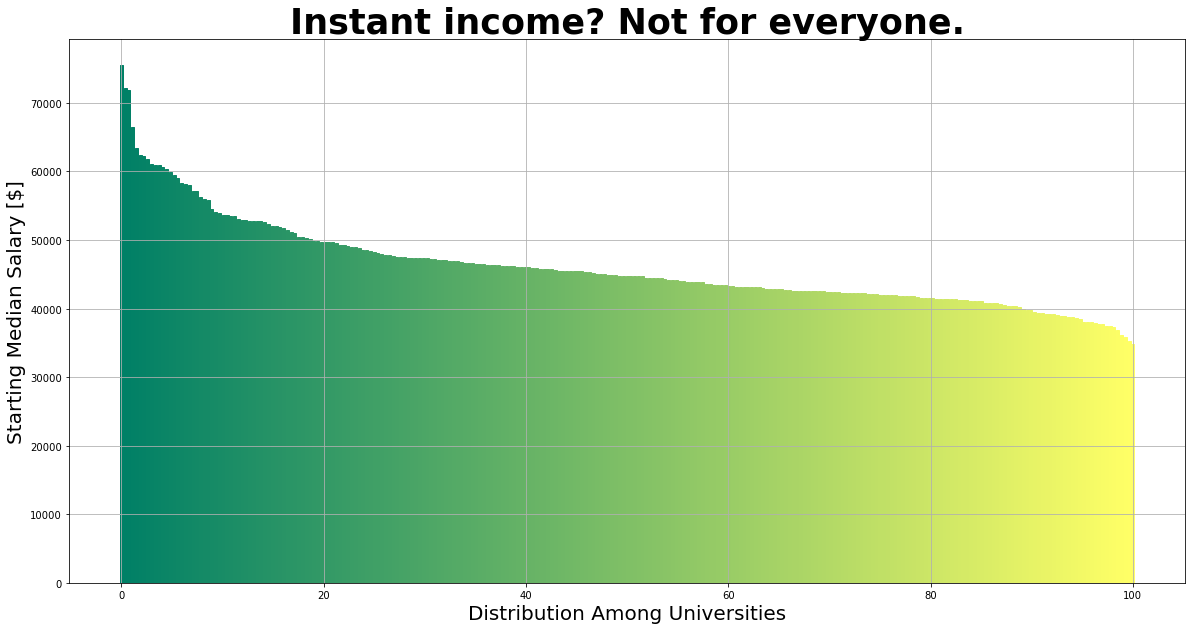

In [137]:
short_term = college.sort_values("start_p50", ascending=False)
values = short_term["start_p50"].tolist()
ind = np.arange(len(values))


# Creating new plot
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.yaxis.grid()
ax.xaxis.grid()
bars = ax.bar(ind, y)

for i, b in enumerate(bars):
    b.set_color(plt.cm.summer(1. * i / (len(values) - 1)))
    
plt.ylabel('Starting Median Salary [$]', fontsize=20)
plt.xlabel('Distribution Among Universities', fontsize=20)
plt.title('Instant income? Not for everyone.', fontsize=35, fontweight='bold')
plt.xticks(np.arange(0, len(ind), (len(ind)-1)/5), [0, 20, 40, 60, 80, 100])

plt.show()

### 3.2. Long term investment
<a id="long_term_investment"></a>

In [138]:
majors_sort = majors.sort_values("mid_p50", ascending=False).head(20)

trace1 = go.Bar(
    x = majors_sort["name"].tolist(),
    y = majors_sort["start_p50"].tolist(),
    name='Starting',
    marker=dict(
        color='rgba(55, 128, 191, 0.7)',
        line=dict(
            color='rgba(55, 128, 191, 1.0)',
            width=2,
        )
    )
)
trace2 = go.Bar(
    x = majors_sort["name"].tolist(),
    y = majors_sort["mid_p50"].tolist(),
    name='Mid-Career',
    marker=dict(
        color='rgba(219, 64, 82, 0.7)',
        line=dict(
            color='rgba(219, 64, 82, 1.0)',
            width=2,
        )
    )
)

trace3 = go.Scatter(
    x = majors_sort["name"].tolist(),
    y = majors_sort["increase"].tolist(),
    name='Percent change',
    mode = 'lines+markers',
    yaxis='y2'
)

data = [trace1, trace2, trace3]
layout = go.Layout(
    barmode='group',
    title = 'Sometimes you have to wait for fruits to work',
    width=850,
    height=500,
    margin=go.Margin(
        l=75,
        r=75,
        b=120,
        t=80,
        pad=10
    ),
    paper_bgcolor='rgb(244, 238, 225)',
    plot_bgcolor='rgb(244, 238, 225)',
    yaxis = dict(
        title= 'Median Salary [$]',
        anchor = 'x',
        rangemode='tozero'
    ),   
    yaxis2=dict(
        title='Change [%]',
        titlefont=dict(
            color='rgb(148, 103, 189)'
        ),
        tickfont=dict(
            color='rgb(148, 103, 189)'
        ),
        overlaying='y',
        side='right',
        anchor = 'x',
        rangemode = 'tozero',
        dtick = 19.5
    ),
    #legend=dict(x=-.1, y=1.2)
    legend=dict(x=0.1, y=0.05)
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

# To be continued...